In [16]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.svm import LinearSVC

import seaborn as sns

# Read the CSV and Perform Basic Data Cleaning

In [20]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Create a Train Test Split

Use `koi_disposition` for the y values

In [19]:
target = df['koi_disposition']

In [5]:
data = df.drop('koi_disposition', axis=1)
features = data.columns

In [6]:
X = data
y = target
variable_names = data.columns

In [7]:
print(X.shape)
print(y.shape)

(8744, 40)
(8744,)


In [8]:
X = data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Pre-processing

Scale the data using the MinMaxScaler

In [9]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\emame\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# PCA

In [21]:
# number of features = number of colunms (40)
pca = PCA(n_components = 40)

In [22]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
importances = pca.explained_variance_ratio_
importances

array([8.22176319e-01, 1.57450190e-01, 1.24360143e-02, 6.84443974e-03,
       7.82917390e-04, 2.69544946e-04, 1.81899466e-05, 1.04395460e-05,
       8.99875020e-06, 2.01352529e-06, 4.70180803e-07, 2.90900170e-07,
       1.05514464e-07, 4.98598107e-08, 1.21069058e-08, 2.07019781e-09,
       8.17734098e-10, 5.13229294e-10, 4.68521758e-10, 3.01536595e-10,
       7.63021604e-11, 3.06519359e-11, 1.48427470e-11, 1.26182352e-11,
       1.08114604e-11, 9.35649491e-12, 5.43094530e-12, 4.04805374e-12,
       3.08779191e-12, 1.78996850e-12, 1.46739742e-12, 1.35603502e-12,
       2.13477224e-13, 9.75265527e-14, 1.54882341e-14, 1.06659489e-15,
       6.03857874e-33, 6.03857874e-33, 6.03857874e-33, 6.03857874e-33])

In [24]:
pca.explained_variance_ratio_.sum()

0.9999999999999998

In [25]:
np.argsort(pca.explained_variance_ratio_)

array([39, 36, 38, 37, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23,
       22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,
        5,  4,  3,  2,  1,  0], dtype=int64)

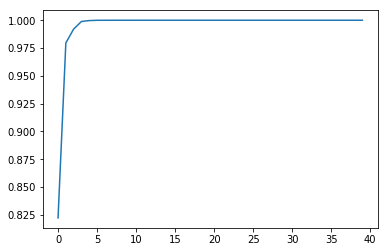

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [27]:
sorted_features = sorted(zip(importances, data.columns), reverse=True)
sorted_features

[(0.8221763186189858, 'koi_fpflag_nt'),
 (0.15745019034226196, 'koi_fpflag_ss'),
 (0.01243601428633211, 'koi_fpflag_co'),
 (0.006844439742682076, 'koi_fpflag_ec'),
 (0.000782917390176286, 'koi_period'),
 (0.00026954494600228446, 'koi_period_err1'),
 (1.8189946598331327e-05, 'koi_period_err2'),
 (1.0439546008138475e-05, 'koi_time0bk'),
 (8.998750203114866e-06, 'koi_time0bk_err1'),
 (2.0135252858279163e-06, 'koi_time0bk_err2'),
 (4.7018080312952303e-07, 'koi_impact'),
 (2.9090017004889834e-07, 'koi_impact_err1'),
 (1.0551446393931478e-07, 'koi_impact_err2'),
 (4.985981065200315e-08, 'koi_duration'),
 (1.2106905751203364e-08, 'koi_duration_err1'),
 (2.0701978102224526e-09, 'koi_duration_err2'),
 (8.177340975345797e-10, 'koi_depth'),
 (5.132292943592924e-10, 'koi_depth_err1'),
 (4.685217579814059e-10, 'koi_depth_err2'),
 (3.015365952383762e-10, 'koi_prad'),
 (7.630216035417402e-11, 'koi_prad_err1'),
 (3.0651935903763945e-11, 'koi_prad_err2'),
 (1.484274696261787e-11, 'koi_teq'),
 (1.261823

In [28]:
svm_pca_df = df[['koi_disposition','koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']]
svm_pca_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec
0,CONFIRMED,0,0,0,0
1,CONFIRMED,0,0,0,0
2,FALSE POSITIVE,0,1,0,0
3,FALSE POSITIVE,0,1,0,0
4,CONFIRMED,0,0,0,0


# Train the Support Vector Machine

In [29]:
y = svm_pca_df['koi_disposition']
# y

In [31]:
X = svm_pca_df.drop('koi_disposition', axis=1)
# X

In [32]:
features = X.columns
# features

In [33]:
variable_names = X.columns
# variable_names

In [34]:
print(X.shape)
print(y.shape)

(8744, 4)
(8744,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
# X_train

In [40]:
# y_train

In [41]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\emame\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train the Support Vector Machine

In [42]:
model3 = SVC(kernel='linear', max_iter=10000)

In [43]:
model3.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=10000, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [45]:
predictions = model3.predict(X_test_scaled)

In [46]:
print(f"Training Data Score: {model3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model3.score(X_test_scaled, y_test)}")

Training Data Score: 0.7500762427569381
Testing Data Score: 0.7543458371454712


# Hyperparameter Tuning
Use GridSearchCV to tune the C and gamma parameters

In [48]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 20],
              'gamma': [0.0001, 0.001, 0.01, 0.1]
             }
grid2 = GridSearchCV(model3, param_grid, verbose=3)

In [49]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, yy_train)

NameError: name 'XX_train_scaled' is not defined

In [89]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 1, 'gamma': 0.0001}
0.7500762427569381


In [90]:
# Make predictions with the hypertuned model
predictions = grid2.predict(XX_test_scaled)

In [91]:
print(f"Training Data Score: {model3.score(XX_train_scaled, yy_train)}")
print(f"Testing Data Score: {model3.score(XX_test_scaled, yy_test)}")

Training Data Score: 0.7500762427569381
Testing Data Score: 0.7543458371454712


In [92]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(yy_test, predictions,
                            target_names=['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']))

                precision    recall  f1-score   support

     CONFIRMED       0.00      0.00      0.00       523
FALSE POSITIVE       0.53      0.98      0.69       594
     CANDIDATE       0.98      1.00      0.99      1069

     micro avg       0.75      0.75      0.75      2186
     macro avg       0.50      0.66      0.56      2186
  weighted avg       0.62      0.75      0.67      2186



C:\Users\emame\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\emame\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\emame\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
